In [61]:
import pandas as pd
import numpy as np
from sklearn import preprocessing, linear_model
from sklearn.model_selection import KFold             # 匯入 K 次交叉驗證工具
from sklearn.metrics import accuracy_score            # 匯入準確度計算工具
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier

train_x = pd.read_csv('dota2Trainx.csv')
train_y = pd.read_csv('dota2Trainy.csv')
test_x = pd.read_csv('dota2Testx.csv')
test_y = pd.read_csv('dota2Testy.csv')

kf = KFold(n_splits=5,                                # 設定 K 值
           random_state=1012,
           shuffle=True)
kf.get_n_splits(train_x)  
model = DecisionTreeClassifier(                   # 創造決策樹模型
        random_state=1012,                            # 參考助教上課內容和自己的測試
        criterion='gini',
        max_depth=110,
        max_leaf_nodes=11 ** 2)                        
model.fit(train_x, train_y)           # 訓練決策樹模型

test_pred_y = model.predict(test_x)
test_acc = accuracy_score(test_y, test_pred_y)
print(test_acc)



# for train_index, valid_index in kf.split(train_x):    # 每個迴圈都會產生不同部份的資料
#     train_x_split = train_x.iloc[train_index]         # 產生訓練資料
#     train_y_split = train_y.iloc[train_index]         # 產生訓練資料標籤
#     valid_x_split = train_x.iloc[valid_index]         # 產生驗證資料
#     valid_y_split = train_y.iloc[valid_index]         # 產生驗證資料標籤
    
#     model = DecisionTreeClassifier(                   # 創造決策樹模型
#         random_state=1012,                            # 參考助教上課內容和自己的測試
#         criterion='gini',
#         max_depth=1000,
#         max_leaf_nodes=10 ** 5)                        
#     model.fit(train_x_split, train_y_split)           # 訓練決策樹模型
    
#     train_pred_y = model.predict(train_x_split)       # 確認模型是否訓練成功
#     train_acc = accuracy_score(train_y_split,         # 計算訓練資料準確度
#                                train_pred_y)
#     valid_pred_y = model.predict(valid_x_split)       # 驗證模型是否訓練成功
#     valid_acc = accuracy_score(valid_y_split,         # 計算驗證資料準確度
#                                valid_pred_y)
    
#     train_acc_list.append(train_acc)
#     valid_acc_list.append(valid_acc)
# print((
#     'average train accuracy: {}\n' +
#     '    min train accuracy: {}\n' +
#     '    max train accuracy: {}\n' +
#     'average valid accuracy: {}\n' +
#     '    min valid accuracy: {}\n' +
#     '    max valid accuracy: {}').format(
#     np.mean(train_acc_list),                          # 輸出平均訓練準確度
#     np.min(train_acc_list),                           # 輸出最低訓練準確度
#     np.max(train_acc_list),                           # 輸出最高訓練準確度
#     np.mean(valid_acc_list),                          # 輸出平均驗證準確度
#     np.min(valid_acc_list),                           # 輸出最低驗證準確度
#     np.max(valid_acc_list)                            # 輸出最高驗證準確度
# ))

0.5603264037303284


我做的是dota2的資料庫的分析 原本是打算做勝負的預測 利用多場對局的結果來做出不同情況下不同隊伍的結果預測

利用決策樹就是為了分析隊伍的組成 將不同隊伍的對局與模式分開 這樣就能知道誰勝誰負

一開始是使用所有資料進行預測 因為這種遊戲的對局 隊伍的組成很重要 還有不同模式下不同的隊伍也會有不同的勝率 但是結果準確率為<u>50%</u> 基本上就是瞎猜

利用Kfold分析之後發現是因為參數調的有點太大 導致overfitting 經過參數調整之後準確度為<u>55%</u> 稍微高了一點 但是還不是很高 還是有overfitting的問題

之後想想也挺合理的 勝負總是有變數 就是同種隊伍對局 也不會有絕對的勝負 像籃球足球比賽一樣 球是圓的 所以勝負預測結果本來就不會有80~90%以上 

理論上勝負預測盲猜的機率是50% 因為有資料作為輔助 所以個人猜測 如果準確度有70% 應該就算準的了 如果資料是只統計同樣十位頂尖高手的對局 應該能更準

然後我又想 雖然隊伍組成很重要 但是英雄之間應該會有幾個是相對厲害的 或者是相剋的 會對勝率有直接的影響 所以比重應該要相對較高

所以我改成用深度學習模型來測試看看


train
Epoch 0, accuracy : 0.5317616161616162
Epoch 1, accuracy : 0.5344616161616165
Epoch 2, accuracy : 0.5132555555555555
Epoch 3, accuracy : 0.5362545454545454
Epoch 4, accuracy : 0.5493525252525255
Epoch 5, accuracy : 0.5611606060606061
Epoch 6, accuracy : 0.5545626262626266
Epoch 7, accuracy : 0.5516595959595958
Epoch 8, accuracy : 0.5682606060606064
Epoch 9, accuracy : 0.5698676767676768
Epoch 10, accuracy : 0.5652474747474747
Epoch 11, accuracy : 0.5716535353535352
Epoch 12, accuracy : 0.5737565656565657
Epoch 13, accuracy : 0.583050505050505
Epoch 14, accuracy : 0.5868545454545455
Epoch 15, accuracy : 0.5900575757575753
Epoch 16, accuracy : 0.5890676767676766
Epoch 17, accuracy : 0.5811525252525255
Epoch 18, accuracy : 0.5857515151515154
Epoch 19, accuracy : 0.5778545454545454
Epoch 20, accuracy : 0.585959595959596
Epoch 21, accuracy : 0.5776595959595958
Epoch 22, accuracy : 0.5852616161616161
Epoch 23, accuracy : 0.5820535353535353
Epoch 24, accuracy : 0.582050505050505
Epoch 2

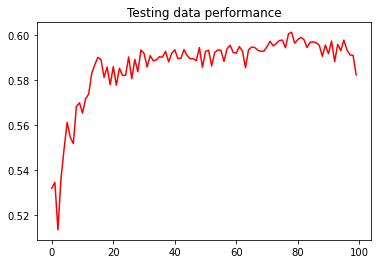

In [60]:
from torch.utils.data import Dataset # 匯入資料集 base class
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

train_x = pd.read_csv('dota2Trainx.csv')
train_x = train_x.values.tolist()
train_y = pd.read_csv('dota2Trainy.csv')
train_y = train_y.div(5).values.tolist()
test_x = pd.read_csv('dota2Testx.csv')
test_x = test_x.values.tolist()
test_y = pd.read_csv('dota2Testy.csv')
test_y = test_y.div(5).values.tolist()
for i in range(len(train_x)):
    for j in range(115):
        train_x[i][j] = float(train_x[i][j])
    train_y[i][0] = float(train_y[i][0])
for i in range(len(test_x)):
    for j in range(115):
        test_x[i][j] = float(test_x[i][j])
    test_y[i][0] = float(test_y[i][0])

class TrainDataset(Dataset):            # 繼承 base class 創造資料集
    def __init__(self, size):        # 給予資料集大小，並隨機創造資料

        self.x = torch.tensor(train_x[1:size])
        self.y = torch.tensor(train_y[1:size])
        
    def __len__(self):               # 定義總資料數
        return len(self.x)
    
    def __getitem__(self, index):    # 定義取出單一資料的方法
        return self.x[index], self.y[index]

class TestDataset(Dataset):            # 繼承 base class 創造資料集
    def __init__(self, size):        # 給予資料集大小，並隨機創造資料

        self.x = torch.tensor(test_x[1:size])
        self.y = torch.tensor(test_y[1:size])
        
    def __len__(self):               # 定義總資料數
        return len(self.x)
    
    def __getitem__(self, index):    # 定義取出單一資料的方法
        return self.x[index], self.y[index]

import torch.nn as nn                   # 匯入神經網路模型
import torch.nn.functional as F         # 匯入激發函數

class MyModel(nn.Module):               # 模型需要繼承自 nn.Module
    def __init__(self,                  # 定義模型結構
                 in_dim,                # 定義輸入層維度
                 hid_dim,               # 定義隱藏層維度
                 out_dim):              # 定義輸出層維度

        super(MyModel, self).__init__() # 繼承 nn.Module 所有屬性
        
        self.layer1 = nn.Linear(        # 創造線性層 self.layer1
            in_features=in_dim,         # 設定線性層輸入維度
            out_features=hid_dim        # 設定線性層輸出維度
        )
        self.layer2 = nn.Linear(        # 創造線性層 self.layer2
            in_features=hid_dim,        # 設定線性層輸入維度
            out_features=hid_dim+200        # 設定線性層輸出維度
        )
        self.layer3 = nn.Linear(        # 創造線性層 self.layer2
            in_features=hid_dim+200,        # 設定線性層輸入維度
            out_features=hid_dim+400        # 設定線性層輸出維度
        )
        self.layer4 = nn.Linear(        # 創造線性層 self.layer2
            in_features=hid_dim+400,        # 設定線性層輸入維度
            out_features=hid_dim+200        # 設定線性層輸出維度
        )
        self.layer5 = nn.Linear(        # 創造線性層 self.layer2
            in_features=hid_dim+200,        # 設定線性層輸入維度
            out_features=hid_dim+100        # 設定線性層輸出維度
        )
        self.layer6 = nn.Linear(        # 創造線性層 self.layer2
            in_features=hid_dim+100,        # 設定線性層輸入維度
            out_features=out_dim        # 設定線性層輸出維度
        )
        
    def forward(self, batch_x):         # 定義運算流程
        h = self.layer1(batch_x)        # 使用線性層 self.layer1 輸入 batch_x 計算得到 h
        y = self.layer2(h)              # 使用線性層 self.layer2 輸入 a 計算得到 y
        y1 = self.layer3(y)              # 使用線性層 self.layer2 輸入 a 計算得到 y
        y2 = self.layer4(y1)              # 使用線性層 self.layer2 輸入 a 計算得到 y
        y3 = self.layer5(y2)              # 使用線性層 self.layer2 輸入 a 計算得到 y
        y4 = self.layer6(y3)              # 使用線性層 self.layer2 輸入 a 計算得到 y
        return y4                        # 輸出 y      
    

from torch.utils.data import DataLoader # 匯入資料集抽樣工具

def collate_fn(batch):                  # 定義格式化的方法
    x_list = []
    y_list = []
    for x, y in batch:
        x_list.append([x])              # 將每個 x 轉換成 [x]
        y_list.append([y])              # 將每個 y 轉換成 [y]
        
    return [torch.tensor(x_list),       # 最終回傳的維度為 (batch_size, features)
            torch.tensor(y_list)]       # 最終回傳的維度為 (batch_size, labels)

import torch.nn as nn                   # 匯入神經網路模型
import torch.nn.functional as F         # 匯入激發函數

if torch.cuda.is_available():                   # 如果有可用 GPU 時採用 GPU cuda:0
    device = torch.device('cuda:0')
else:                                           # 若無 GPU 可用則使用 CPU
    device = torch.device('cpu')

train_dataset = TrainDataset(90000)         # 創造訓練資料集
test_dataset = TestDataset(10000)           # 創造測試資料集

# 設定超參數

batch_size = 100                       # 設定每次抽樣的數量
n_epoch = 100                             # 設定資料集總訓練次數
hid_dim = 200                            # 設定隱藏層維度

train_data_loader = DataLoader(         # 創造 DataLoader 實例
    train_dataset,                      # 對資料集 train_dataset 進行抽樣
    batch_size=batch_size,              # 設定每次抽樣的數量
    shuffle=True,                       # 設定隨機抽樣
)
test_data_loader = DataLoader(          # 創造 DataLoader 實例
    test_dataset,                       # 對資料集 test_dataset 進行抽樣
    batch_size=batch_size,              # 設定每次抽樣的數量
    shuffle=True,                       # 設定隨機抽樣
)

model = MyModel(                        # 創造 MyModel 模型實例
    in_dim=115,                           # 設定輸入層維度
    hid_dim=hid_dim,                    # 設定隱藏層維度
    out_dim=1                           # 設定輸出層維度
)
model = model.to(device)                # 將模型搬移至 GPU

criterion = nn.MSELoss()                # 創造均方誤差計算工具

from torch.optim import SGD             # 匯入計算梯度下降演算法的工具

optimizer = SGD(                        # 創造計算隨機梯度下降的工具
    model.parameters(),                 # 設定計算梯度下降的目標
    lr=0.000001                           # 設定學習率
)
print('train')
loss_list = []
for epoch in range(n_epoch):            # 總共訓練 n_epoch 次
    for batch_x, batch_y in train_data_loader:
        batch_x = batch_x.to(device)    # 將訓練資料搬移至 GPU
        batch_y = batch_y.to(device)    # 將訓練資料標記搬移至 GPU
        
        pred_y = model(batch_x)         # 自動呼叫 forward 計算 batch_x 得到 pred_y
        # print(pred_y)
        # one = torch.ones_like(pred_y)
        # negone = one * -1
        # result = pred_y
        # result = torch.where(result > 0.0, one, negone)
        # for i in range(len(pred_y)):
        #     if pred_y[i] >= 0:
        #         pred_y[i] = 1.0
        #     else:
        #         pred_y[i] = -1.0
            
        # print(result)
        # print(pred_y)
        loss = criterion(pred_y,        # 計算 pred_y 與 batch_y 的均方誤差
                         batch_y)
        
        loss.backward()                 # 使用向後傳播計算梯度
        optimizer.step()                # 使用梯度下降更新模型參數
    with torch.no_grad():               # 此區塊不會計算梯度
        total_loss = 0                  # 統計訓練資料誤差
        # for batch_x, batch_y in train_data_loader:
        #     batch_x = batch_x.to(device)
        #     batch_y = batch_y.to(device)
            
        #     pred_y = model(batch_x)
        #     for i in range(len(pred_y)):
        #         if pred_y[i] >= 0:
        #             pred_y[i] = 1
        #         else:
        #             pred_y[i] = -1
        #     loss = 0
        #     for i in range(len(pred_y)):
        #         if pred_y[i] != batch_y[i]:
        #             loss = loss + 1

        #     loss = loss/len(pred_y)

        #     total_loss += float(loss) / len(train_data_loader)
        # print('Epoch {}, training loss: {}'.format(epoch, total_loss))
        
        total_loss = 0                  # 統計測試資料誤差
        acc= 0
        for batch_x, batch_y in test_data_loader:
            batch_x = batch_x.to(device)
            batch_y = batch_y.to(device)
            
            pred_y = model(batch_x)
            loss = 0
            loss = criterion(pred_y, batch_y)
            total_loss += float(loss) / len(test_data_loader)
            correct = 0
            for i in range(len(pred_y)):
                if pred_y[i] >= 0 and batch_y[i] == 0.2:
                    correct = correct + 1
                elif  pred_y[i] < 0 and batch_y[i] == -0.2:
                    correct = correct + 1
            correct = correct / len(pred_y)
            acc += correct / len(test_data_loader)        

        print('Epoch {}, accuracy : {}'.format(epoch, acc))  
        # print('Epoch {}, testing loss: {}'.format(epoch, total_loss))
        loss_list.append(acc)
x_list = []
for i in range(len(loss_list)):
    x_list.append(i)
# print(loss_list)
print(max(loss_list))
plt.plot(loss_list, color='red') # 畫出測試資料答案分佈
plt.title('Testing data performance')
plt.show()
        #     loss = criterion(pred_y, batch_y)
            
        #     total_loss += float(loss) / len(test_data_loader)
        # # print(pred_y)
        # # print(batch_y)
        # print('Epoch {}, testing loss: {}'.format(epoch, total_loss))

# with torch.no_grad():
#     for batch_x, batch_y in train_data_loader:
#         batch_x = batch_x.to(device)
#         batch_y = batch_y.to(device)

#         pred_y = model(batch_x)
        
#         batch_x = batch_x.to('cpu')
#         batch_y = batch_y.to('cpu')
#         pred_y = pred_y.to('cpu')
        
#         x_list = []
#         for i in range(len(batch_y)):
#             x_list.append(i)

#         plt.scatter(x_list, batch_y, color='red') # 畫出訓練資料答案分佈
#         plt.scatter(x_list, pred_y, color='blue') # 畫出訓練資料預測分佈
        
#     plt.title('Training data performance')
#     plt.show()
    
#     for batch_x, batch_y in test_data_loader:
#         batch_x = batch_x.to(device)
#         batch_y = batch_y.to(device)

#         pred_y = model(batch_x)

#         batch_x = batch_x.to('cpu')
#         batch_y = batch_y.to('cpu')
#         pred_y = pred_y.to('cpu')
        
#         x_list = []
#         for i in range(len(batch_y)):
#             x_list.append(i)

#         plt.scatter(x_list, batch_y, color='red') # 畫出測試資料答案分佈
#         plt.scatter(x_list, pred_y, color='blue') # 畫出測試資料預測分佈
    
#     plt.title('Testing data performance')
#     plt.show()

結果進步到了<u>接近60%</u> 這邊的accuracy是將輸出的值進行兩極分化 大於0就為1 小於就為-1 在跟測資比對

![title](nn.png)

就結果而言 已經明顯大於50% 代表這個預測已經不是瞎猜了 但是經過調整應該還可以更高

![title](60%.png)

經過參數的調整 將model改大一點深一點 learning rate/epoch 這些調整一下 最大可以超過60%

還有調整資料 因為結果都只為1/-1 會讓資料辨識不好 所以調整成0.2/-0.2

從結果來看確實是更好也更正常

無法達到目標的70% 也許是因為方法錯誤 但是也有一部份是因為這款遊戲設計得很平衡 沒有絕對優勢的隊伍或英雄

還有就是資料是隨機蒐集的 大部分普通玩家沒這麼厲害 不管隊伍為何 勝負更多的是五五開 所以無法有效的判斷

如果是只蒐集特定的玩家 尤其是高手 這樣進行資料分析準確度才會高